# TikTok Project

---

**This notebook has a goal apply de PACE strategy on tiktok dataset to build a detailed data analysis and share the results**

---

## **PACE: Plan**

This stage is where i've the first contact with the dataset and when i start to plan what to do with the data to achieve my goals. Normally, I start making some questions to dataset. Let's get start  (Remenber, this first questions don't have high accuracy )

### What are the data columns most relevant to your deliverable?
  - video like count
  - video comment count
  - video view count
  - video duration sec
  - video share count
  - video download count

### What are the data columns most irrelevant to your deliverable?
  - ID

### Are in your dataset missing or incomplete data?
  -  Yes, we have 298 records without data


### Which EDA practices will be required to begin this project?
  - Data cleaning & Validity checks
  - Temporal Analysis
  - Univariate Analysis (Distribution of Target)
  - Bivariate Analysis (Feature Relationships)


## **Pace: Analyze**

In this stage i start data cleaning and validade checks and witch steps is i've do to achive the best results. We can continue with some questions.


### What steps need to be taken to perform EDA in the most effective way to achieve the project goal?
  #### First: I start plotting my data with Ydata to start my analisys (this is valid for Plan fase too)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

df_titok = pd.read_csv("tiktok_dataset.csv")
df_titok.drop("ID", axis=1, inplace=True)
profile_taxi = ProfileReport(df_titok, title="Waze analysis with ydata", explorative=True)
profile_taxi.to_file("tiktok_analysis.html")
df_titok.describe()

C:\Users\samue\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 58.12it/s]


,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


#### Thit: I start cleaning inconsistant data i find in my plan fase

In [4]:
df_titok.dropna(subset=['video_transcription_text'], inplace=True)

#### Then i get anoter report with ydata and print some graphs to identify outliers and reanilyze the dataset

Outlier Statistics (IQR Method):

video_view_count:
  IQR: 499384.50
  Bounds: -744134.25 to 1253403.75
  Outliers: 0 (0.00%)

video_like_count:
  IQR: 124209.25
  Bounds: -185503.12 to 311333.88
  Outliers: 1726 (9.04%)

video_share_count:
  IQR: 18107.00
  Bounds: -27045.50 to 45382.50
  Outliers: 2508 (13.14%)

video_download_count:
  IQR: 1149.25
  Bounds: -1716.88 to 2880.12
  Outliers: 2450 (12.84%)

video_comment_count:
  IQR: 291.00
  Bounds: -435.50 to 728.50
  Outliers: 2789 (14.61%)


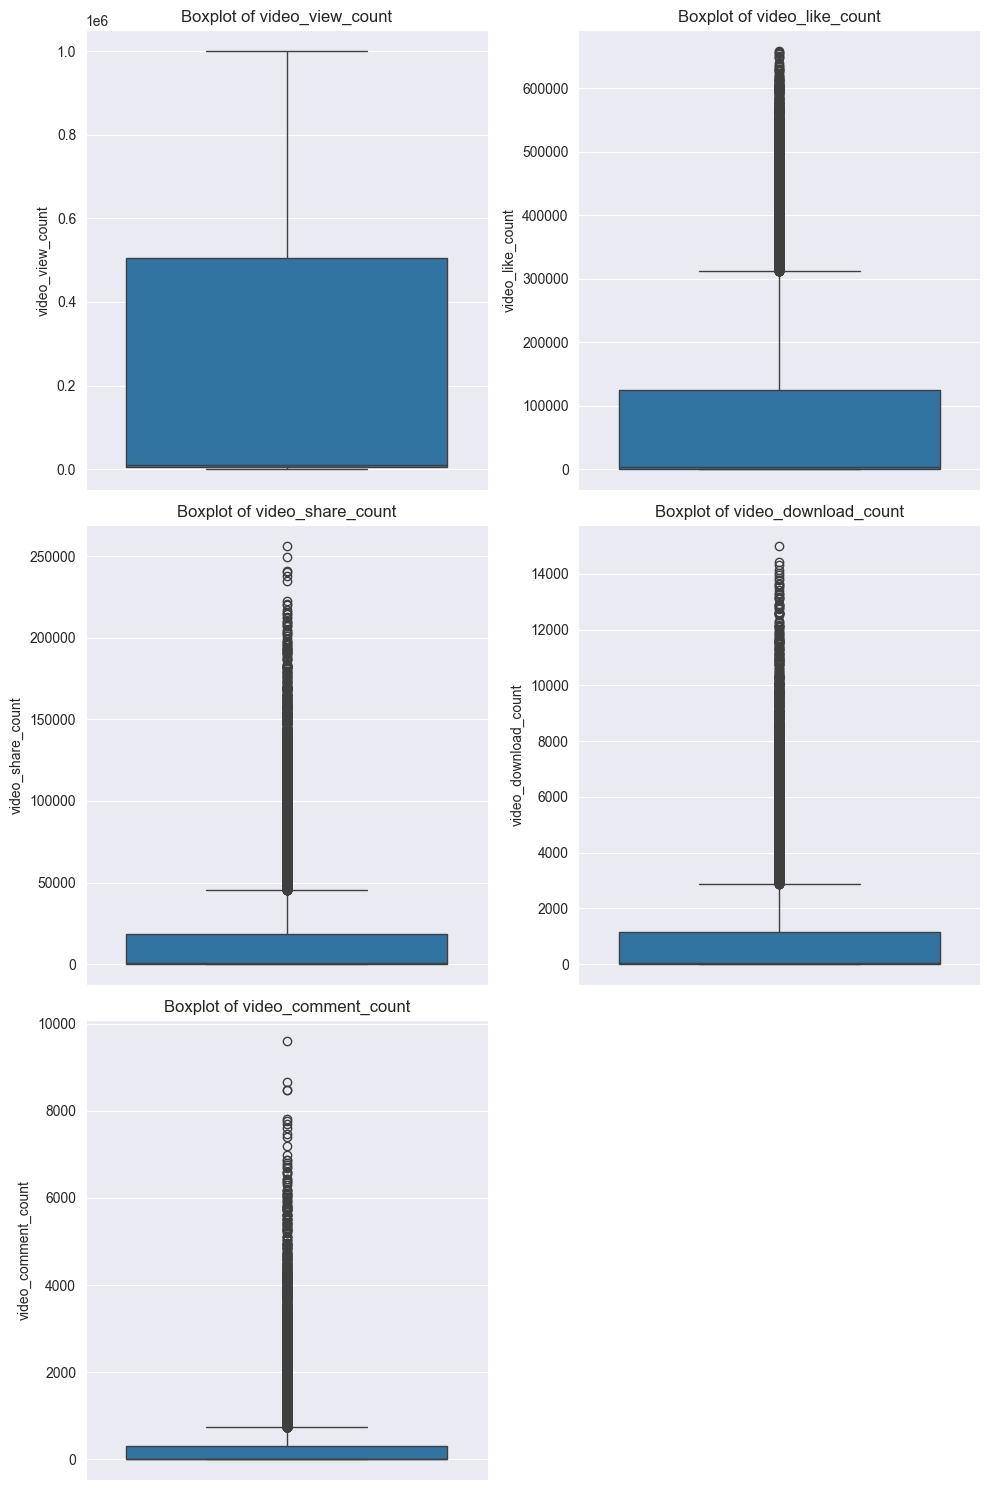

In [5]:
cols_to_check = ['video_view_count', 'video_like_count', 'video_share_count', 'video_download_count', 'video_comment_count']

# 1. Visualization: Boxplots
plt.figure(figsize=(10, 15))
for i, col in enumerate(cols_to_check):
    plt.subplot(3, 2, i+1)
    sns.boxplot(y=df_titok[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.savefig('outlier_boxplots.png')

outlier_stats = {}
for col in cols_to_check:
    Q1 = df_titok[col].quantile(0.25)
    Q3 = df_titok[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df_titok[(df_titok[col] < lower_bound) | (df_titok[col] > upper_bound)]
    outlier_stats[col] = {
        'IQR': IQR,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Num Outliers': len(outliers),
        'Percentage': (len(outliers) / len(df_titok)) * 100
    }

# Print stats
print("Outlier Statistics (IQR Method):")
for col, stats in outlier_stats.items():
    print(f"\n{col}:")
    print(f"  IQR: {stats['IQR']:.2f}")
    print(f"  Bounds: {stats['Lower Bound']:.2f} to {stats['Upper Bound']:.2f}")
    print(f"  Outliers: {stats['Num Outliers']} ({stats['Percentage']:.2f}%)")
